In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#this code below is to make %%time magic work
import glob
import os
from __future__ import print_function
#this code above is to make %%time magic work


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory = 'C:/Users/N1110/Desktop/7331_Project/data/'
df = pd.read_csv(directory + 'Diabetes_tmp_Cleaned.csv')

df_clean = df
df_clean.replace('?', np.nan, inplace=True)
df_clean.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,readmitted,diag_1_val,diag_2_val,diag_3_val,readmitted_tf,medication_count,admission_source,discharge_disposition,admission_type,meds_increased
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,NO,Diabeties,None,None,0,0,Physician Referral,Not Mapped,NaN,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unspecified,...,>30,Neoplasms,Diabeties,Neoplasms,1,1,Emergency Room,Discharged to home,Emergency,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unspecified,...,NO,Other,Diabeties,Other,0,1,Emergency Room,Discharged to home,Emergency,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unspecified,...,NO,Neoplasms,Diabeties,Circulatory,0,1,Emergency Room,Discharged to home,Emergency,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unspecified,...,NO,Neoplasms,Neoplasms,Diabeties,0,2,Emergency Room,Discharged to home,Emergency,0


In [3]:
df_clean.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_tf,medication_count,meds_increased
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.675904,4.388362,4.372443,4.589696,34.047383,1.456577,16.560492,0.369357,0.212232,0.635566,7.422607,0.460881,1.178616,0.120089
std,1.026403e+08,3.869636e+07,1.530799,6.013795,4.687549,3.160314,22.386944,1.792201,9.105980,1.267265,0.917842,1.262863,1.933600,0.498470,0.924977,0.325067
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,16.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000
50%,1.523890e+08,4.550514e+07,3.000000,1.000000,2.000000,4.000000,30.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000
75%,2.302709e+08,8.754595e+07,4.000000,6.000000,7.000000,6.000000,49.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,2.000000,0.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,129.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,6.000000,1.000000


In [4]:
df_clean.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

In [5]:
## prepare the dataset for clustering
# a subset of features from the dataset to cluster upon

# Columns discussed for inclusion: all 20 meds, age, gender,  A1C, max glu serum; others TBD
# One hot encoding for meds; age ordinal; 
# whichever model is final with best results then NOTATE what made it best and all code that generated it

In [6]:
#can also use binary encoder to achieve this
df_clean.gender[df_clean.gender == 'Male'] = 0
df_clean.gender[df_clean.gender == 'Female'] = 1

df_clean["gender"] = df_clean["gender"].astype(int)

In [7]:
#10 age groups; Ordinal encoding
#feature density plot of age can help with answering the question like: does people older age tend to be readmitted?
#can use map/apply function to achieve this

df_clean.age[df_clean.age== '[0-10)'] = 1
df_clean.age[df_clean.age== '[10-20)'] = 2
df_clean.age[df_clean.age== '[20-30)'] = 3
df_clean.age[df_clean.age== '[30-40)'] = 4
df_clean.age[df_clean.age== '[40-50)'] = 5
df_clean.age[df_clean.age== '[50-60)'] = 6
df_clean.age[df_clean.age== '[60-70)'] = 7
df_clean.age[df_clean.age== '[70-80)'] = 8
df_clean.age[df_clean.age== '[80-90)'] = 9
df_clean.age[df_clean.age== '[90-100)'] = 10

df_clean["age"] = df_clean["age"].astype(int)

In [8]:
#one hot encoding categorical variables
#"metformin", "repaglinide", "nateglinide", "chlorpropamide",
           #  "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
            # "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone",
            # "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin",
             #"metformin-rosiglitazone", "metformin-pioglitazone",

dummiesList=[ "insulin","A1Cresult", "max_glu_serum"]
df_clean_wDummies = pd.get_dummies(df_clean[dummiesList])

In [9]:
#combine with numerical features 
NumFeatures=["gender","age"]
df_clean_wDummies= pd.concat((df_clean_wDummies, df_clean[NumFeatures]), axis=1) 
#try age gender insulin max_glu_serum  A1Cresult with subset 0.1 sample

In [10]:
df_clean_wDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 14 columns):
insulin_Down          101766 non-null uint8
insulin_No            101766 non-null uint8
insulin_Steady        101766 non-null uint8
insulin_Up            101766 non-null uint8
A1Cresult_>7          101766 non-null uint8
A1Cresult_>8          101766 non-null uint8
A1Cresult_None        101766 non-null uint8
A1Cresult_Norm        101766 non-null uint8
max_glu_serum_>200    101766 non-null uint8
max_glu_serum_>300    101766 non-null uint8
max_glu_serum_None    101766 non-null uint8
max_glu_serum_Norm    101766 non-null uint8
gender                101766 non-null int32
age                   101766 non-null int32
dtypes: int32(2), uint8(12)
memory usage: 1.9 MB


In [11]:
df_clean_wDummies.head()

,insulin_Down,insulin_No,insulin_Steady,insulin_Up,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,gender,age
0,0,1,0,0,0,0,1,0,0,0,1,0,1,1
1,0,0,0,1,0,0,1,0,0,0,1,0,1,2
2,0,1,0,0,0,0,1,0,0,0,1,0,1,3
3,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,0,1,0,0,0,1,0,0,0,1,0,0,5


In [12]:
subsam_df_clean_wDummies=df_clean_wDummies.sample(frac=0.1)



In [13]:
#this step Worked
#normalize the reduced df4 to prepare for parallel_coordinates plots
# Methods for Scaling data:

df=subsam_df_clean_wDummies
# 1. Min-max scaling
df_norm_MinMax = (df - df.min()) / (df.max() - df.min())

#normal scaling (0 mean 1 sd scaling)
df_norm_musigma = (df - df.mean()) / (df.std())

df_norm_medsigma = (df - df.median()) / (df.std())

In [14]:
df_norm_MinMax.head()

,insulin_Down,insulin_No,insulin_Steady,insulin_Up,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,gender,age
74976,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.888889
101590,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.777778
34441,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.666667
39069,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667
14825,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.666667


KeyboardInterrupt: 

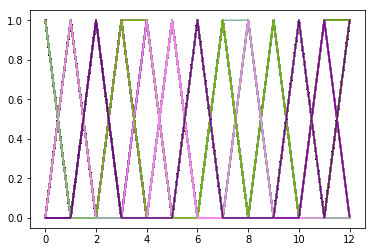

In [15]:
#parelle plot
#subsmple #took 1 mins
from pandas.plotting import parallel_coordinates
parallel_coordinates(df_norm_MinMax,"age")
plt.xticks(rotation = 90)

In [ ]:
#took 2 mins
parallel_coordinates(df_norm_musigma,"age")
plt.xticks(rotation = 90)

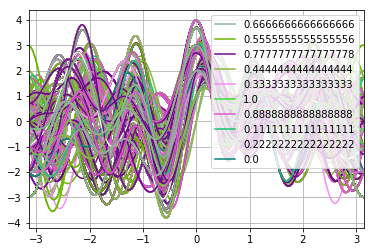

In [25]:
#took 2 mins
from pandas.plotting import andrews_curves
andrews_curves(df_norm_MinMax,"age")


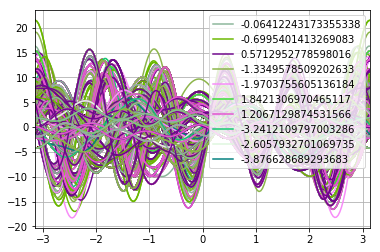

In [26]:
#took 4 mins
andrews_curves(df_norm_musigma,"age")

In [ ]:
#X=subsam_df_clean_wDummies

In [11]:
#from sklearn.preprocessing import StandardScaler
#scl_obj = StandardScaler()

#scl_obj.fit(X)
#X_scaled = scl_obj.transform(X)

In [16]:
X=df_norm_MinMax

In [29]:
#run fast 
#kmeans = KMeans(n_clusters=3) # You want cluster the patients into 3 groups #Type of Diabetes, i.e. Type 1, 2, gestational
#kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
#run fast 
cls = KMeans(n_clusters=3, init='k-means++',random_state=1)
cls.fit(X)
newfeature = cls.labels_ # the labels from kmeans clustering

In [23]:
#cls.labels_

array([0, 0, 1, ..., 1, 1, 2])

In [24]:
#X

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [18]:
X2 = np.column_stack((X,pd.get_dummies(newfeature)))

In [19]:
X2

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

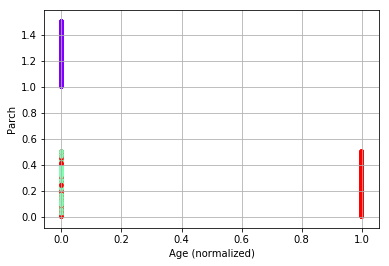

In [20]:
#run fast 
plt.figure()
#plt.subplot(1,2,1)
X2=X2
plt.scatter(X2[:, 0], X2[:, 1]+np.random.random(X2[:, 1].shape)/2, c=newfeature, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Age (normalized)'), plt.ylabel('Parch')
plt.grid()

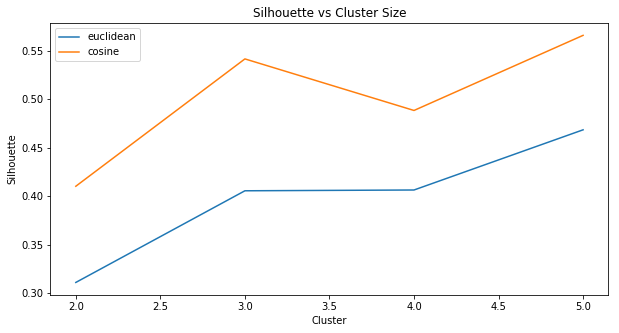

In [21]:
#run for 1 min

data=df_norm_MinMax

# Silhouette vs Cluster Size
# do it for the k-means
from sklearn import metrics
from sklearn.cluster import KMeans

seuclid = []
scosine = []
k = range(2,6)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(X)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(data, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(data, labels, metric='cosine'))
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4018520598696504
For n_clusters = 3 The average silhouette_score is : 0.5325330459080557
For n_clusters = 4 The average silhouette_score is : 0.5433517546441852
For n_clusters = 5 The average silhouette_score is : 0.5206210897462092
For n_clusters = 6 The average silhouette_score is : 0.5599556066282623


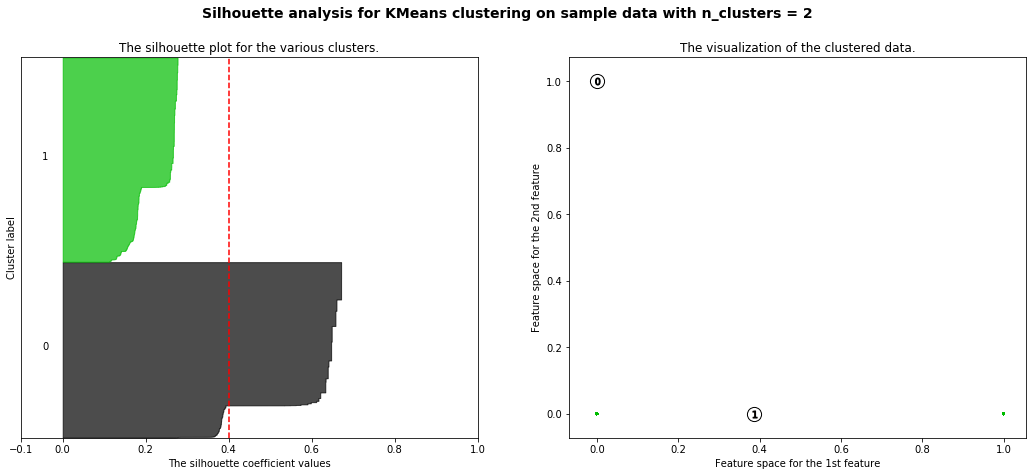

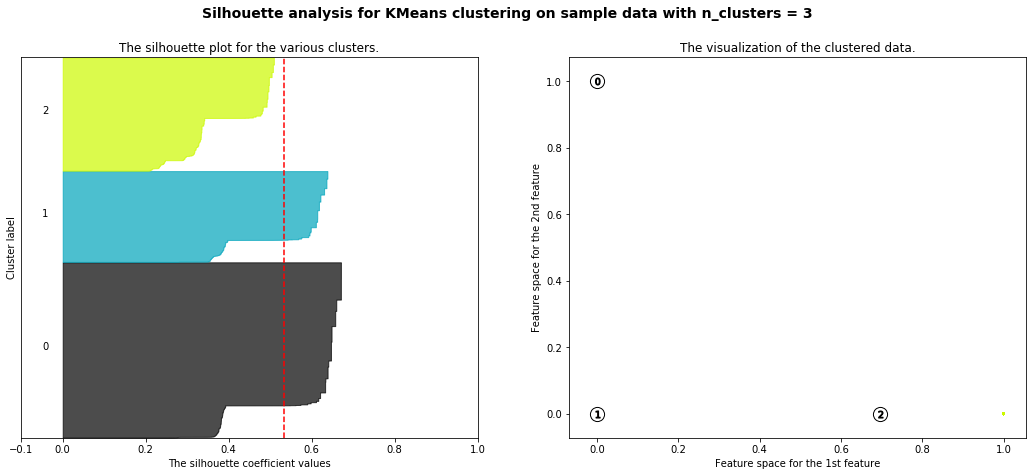

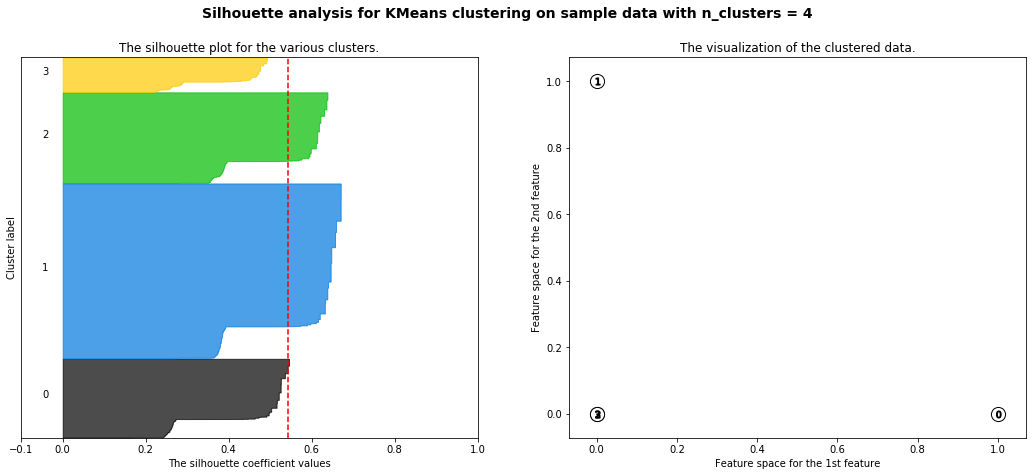

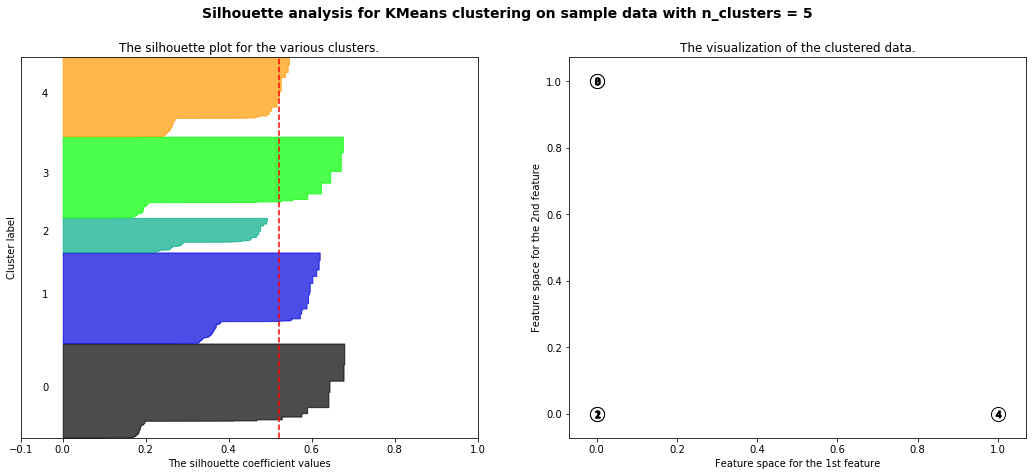

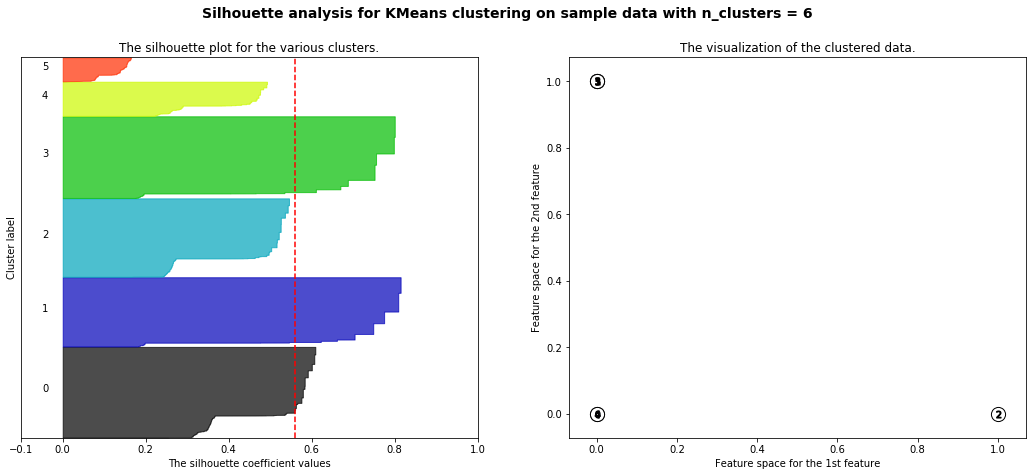

In [22]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

print(__doc__)

# y_lower = 10?
X=X2
y=newfeature
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
